In [2]:
# multidimensional arrays
import numpy as np
import math
import pandas as pd
from scipy.optimize import curve_fit

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
#data from direct.csv
sum_prog, err_prog = np.genfromtxt("direct.csv", dtype=float, delimiter=',', unpack=True)
# reading data from GBM.csv
sum_prog1, err_prog1 = np.genfromtxt("GBM.csv", dtype=float, delimiter=',', unpack=True)

In [4]:
#theoretical results
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.lib.scimath.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.lib.scimath.sqrt(T)) * (np.lib.scimath.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.lib.scimath.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

call, put = black_scholes(S0, K, T, r, sigma)

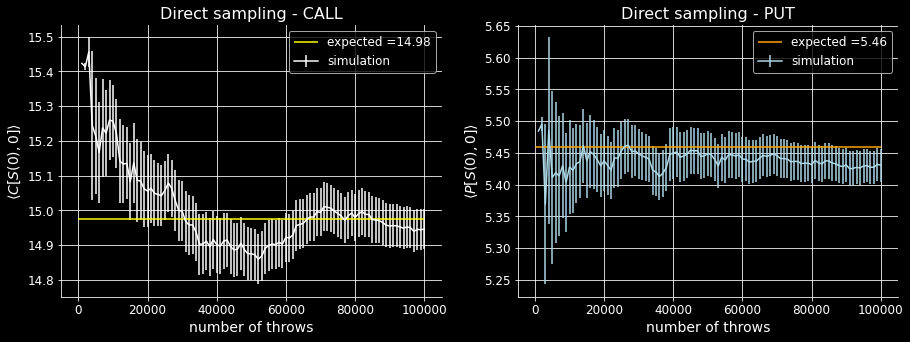

In [17]:
# plot data

M = 100000
N = 100
L = int(M/N)
x = [ i*L for i in range(1, N+1) ]  #throws

delimiter = N

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.style.use('dark_background')

ax1.errorbar(x, sum_prog[:N], yerr=err_prog[:N], color='white', label='simulation')
ax1.set_title("Direct sampling - CALL")
ax1.set_xlabel("number of throws")
ax1.set_ylabel(r"$\langle C [S(0), 0]\rangle$")
ax1.hlines(call, 0, M, color='yellow', label=f'expected ='+str(round(call,2)))
ax1.grid(True)
ax1.legend()

ax2.errorbar(x, sum_prog[N:], yerr=err_prog[N:], color='lightblue', label='simulation')
ax2.set_title("Direct sampling - PUT")
ax2.set_xlabel("number of throws")
ax2.set_ylabel(r"$\langle P [S(0), 0]\rangle$")
ax2.hlines(put, 0, M, color='orange', label=f'expected ='+str(round(put,2)))
ax2.grid(True)
ax2.legend()

The graphs show the progressive estimation of the price of a European call and put option respectively. The estimates were obtained using the data blocking method, for each block $10^5 $ simulations were performed. In this case, since the final price distribution (GBM) is known, we have directly sampled from it the price at time $T$ for each simulation. The block averages method allowed the estimation of the uncertainty, shown in the graph, while the expected value was calculated starting from the exact analytical solution of Black-Scholes.

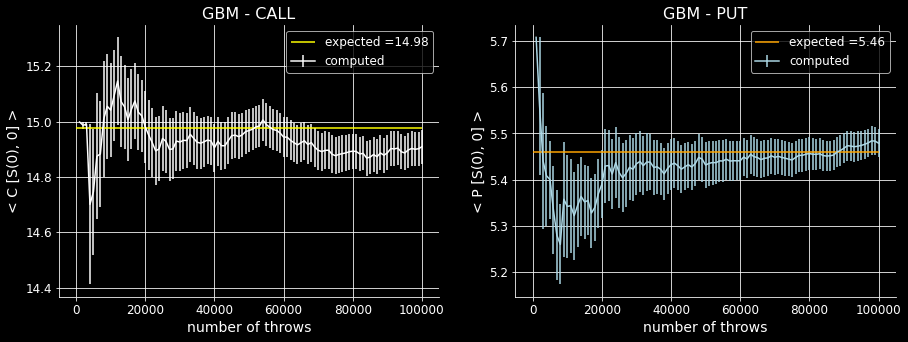

In [25]:
# plot progressive data

M = 100000
N = 100
L = int(M/N)
x = [ i*L for i in range(1, N+1) ]  # progressive throws

delimiter = N

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.style.use('dark_background')

ax1.errorbar(x, sum_prog1[:N], yerr=err_prog1[:N], color='white', label='computed')
ax1.set_title("GBM - CALL")
ax1.set_xlabel("number of throws")
ax1.set_ylabel(r"< C [S(0), 0] >")
ax1.hlines(call, 0, M, color='yellow', label=f'expected ='+str(round(call,2)))
ax1.grid(True)
ax1.legend()

ax2.errorbar(x, sum_prog1[N:], yerr=err_prog1[N:], color='lightblue', label='computed')
ax2.set_title("GBM - PUT")
ax2.set_xlabel("number of throws")
ax2.set_ylabel(r"< P [S(0), 0] >")
ax2.hlines(put, 0, M, color='orange', label=f'expected ='+str(round(put,2)))
ax2.grid(True)
ax2.legend()

These graphs are similar to the previous ones, the difference lies in the fact that in this case the price at time $T$ in each of the $10^5$ simulations per block was obtained by directly simulating a discretized geometric Brownian motion (in 100 steps in this case), and thus obtaining the estimate of the price at time $T$.